In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sklearn
import sklearn.linear_model
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
data = pd.read_csv("Oil_gas.csv")

In [7]:
data.describe()


,iso3numeric,year,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,oil_value_2014,gas_prod55_14,gas_price_2000_mboe,...,net_gas_exports_mboe,net_gas_exports_value,net_gas_exports_valuePOP,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014
count,15521.000000,15521.000000,1.010300e+04,15503.000000,15521.000000,1.010300e+04,1.010300e+04,1.010300e+04,8812.000000,1.552100e+04,...,4016.000000,3.880000e+03,3875.000000,3875.000000,1.290100e+04,1.180400e+04,15521.000000,15521.000000,15521.000000,1.552100e+04
mean,440.102055,1973.000000,1.834108e+07,26.513076,19.407381,4.049737e+09,4.777023e+09,6.567325e+09,100.702009,1.403597e+07,...,-0.357088,-1.944983e+07,60.045237,338.550092,2.822745e+07,2.729075e+07,0.676954,4.674194,6.425958,1.374774e+00
std,266.690184,23.959069,6.384938e+07,21.459869,27.819908,2.017801e+10,2.100122e+10,2.887193e+10,462.242415,1.102009e+07,...,146.611793,3.552873e+09,562.366542,2182.837956,9.860353e+07,9.488217e+07,0.467655,3.873224,5.324805,8.016068e-14
min,4.000000,1932.000000,0.000000e+00,7.879107,0.670000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,-810.271076,-3.290943e+10,-918.095672,-7760.660272,2.510100e+04,2.510100e+04,0.000000,0.727393,1.000000,1.374774e+00
25%,204.000000,1952.000000,0.000000e+00,11.710310,1.800000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,-5.524986,-8.709102e+07,-8.372933,-81.010366,2.194275e+06,2.108201e+06,0.000000,1.161943,1.597409,1.374774e+00
50%,422.000000,1973.000000,4.980000e+04,14.067980,3.290000,2.064857e+06,7.171990e+06,9.859862e+06,0.000000,1.472159e+07,...,0.000000,0.000000e+00,0.000000,0.000000,6.469000e+06,6.178436e+06,1.000000,3.876222,5.328927,1.374774e+00
75%,694.000000,1994.000000,4.025170e+06,36.535130,25.023256,3.808598e+08,6.935786e+08,9.535135e+08,21.684397,1.915340e+07,...,0.000000,0.000000e+00,0.000000,17.434919,1.932096e+07,1.863778e+07,1.000000,6.483330,8.913110,1.374774e+00
max,998.000000,2014.000000,6.160000e+08,85.170708,111.669702,4.044369e+11,3.401958e+11,4.676922e+11,5605.121816,4.877320e+07,...,1309.582987,6.281075e+10,11205.517349,32331.463722,1.364270e+09,1.331400e+09,1.000000,13.280064,18.257080,1.374774e+00


In [8]:
data.isnull().count()

cty_name                        15521
iso3numeric                     15521
id                              15521
year                            15521
eiacty                          15521
oil_prod32_14                   15521
oil_price_2000                  15521
oil_price_nom                   15521
oil_value_nom                   15521
oil_value_2000                  15521
oil_value_2014                  15521
gas_prod55_14                   15521
gas_price_2000_mboe             15521
gas_price_2000                  15521
gas_price_nom                   15521
gas_value_nom                   15521
gas_value_2000                  15521
gas_value_2014                  15521
oil_gas_value_nom               15521
oil_gas_value_2000              15521
oil_gas_value_2014              15521
oil_gas_valuePOP_nom            15521
oil_gas_valuePOP_2000           15521
oil_gas_valuePOP_2014           15521
oil_exports                     15521
net_oil_exports                 15521
net_oil_expo

In [10]:
data.head()

,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,...,net_gas_exports_mboe,net_gas_exports_value,net_gas_exports_valuePOP,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014
0,Afghanistan,4,AFG,1932,Afghanistan,NaN,10.860860,0.87,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.599874,17.321973,1.374774
1,Afghanistan,4,AFG,1933,Afghanistan,NaN,8.815239,0.67,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,13.280064,18.257080,1.374774
2,Afghanistan,4,AFG,1934,Afghanistan,NaN,12.715790,1.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.853008,17.669975,1.374774
3,Afghanistan,4,AFG,1935,Afghanistan,NaN,12.039690,0.97,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.537882,17.236748,1.374774
4,Afghanistan,4,AFG,1936,Afghanistan,NaN,13.383210,1.09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.420786,17.075768,1.374774


In [33]:
poly = sklearn.preprocessing.PolynomialFeatures(degree=4)

In [34]:
x = data["year"]
x  = np.array(x).reshape(-1,1)
#x  = np.array(x).reshape(-1,1)
y = data["oil_price_nom"]

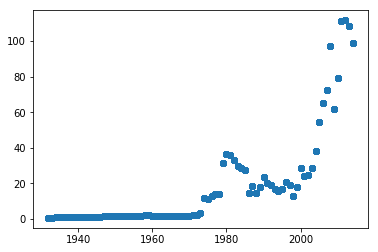

In [35]:
plt.scatter(x,y)
plt.show()

In [36]:
x_poly = poly.fit_transform(x)
reg = sklearn.linear_model.LinearRegression()

In [37]:
x.shape

(15521, 1)

In [38]:
reg.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
reg.score(x_poly,y)*100

84.258372363980754

In [40]:
x_poly # yaha 1 q aya:

array([[  1.00000000e+00,   1.93200000e+03,   3.73262400e+06,
          7.21142957e+09,   1.39324819e+13],
       [  1.00000000e+00,   1.93300000e+03,   3.73648900e+06,
          7.22263324e+09,   1.39613500e+13],
       [  1.00000000e+00,   1.93400000e+03,   3.74035600e+06,
          7.23384850e+09,   1.39902630e+13],
       ..., 
       [  1.00000000e+00,   2.01200000e+03,   4.04814400e+06,
          8.14486573e+09,   1.63874698e+13],
       [  1.00000000e+00,   2.01300000e+03,   4.05216900e+06,
          8.15701620e+09,   1.64200736e+13],
       [  1.00000000e+00,   2.01400000e+03,   4.05619600e+06,
          8.16917874e+09,   1.64527260e+13]])

In [41]:
x_poly.shape

(15521, 5)

In [42]:
'''
Accuracy - 57% - (degree=1)
LinearRegression 
Accuracy - 77% - (degree=2)
LinearRegression 
Accuracy - 84% - (degree=3)
LinearRegression 
Accuracy - 84% - (degree=4)
'''

'\nAccuracy - 57% - (degree=1)\nLinearRegression \nAccuracy - 77% - (degree=2)\nLinearRegression \nAccuracy - 84% - (degree=3)\nLinearRegression \nAccuracy - 84% - (degree=4)\n'